# This Notebook is made by Abdulrahman Taher during Summation by Parts class, which is given by Professor Matteo Parsani




In [2]:

import SBP  
import sympy as smp



The following was taken from a useful google collab by [Caio Ciardelli](https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/L3_Gauss_Lobatto_Legendre_quadrature.ipynb#scrollTo=W1N7nQj6BJil)


The Gauss-Lobatto-Legendre (GLL) quadrature uses a set of weights and the function values at a number of nodes to approximate its integral over the standard interval $[-1, 1]$ by a summation:
<br>
<br>
\begin{equation}
  \int_{-1}^{1} f\,(\xi)\,d\xi
  \,\approx\,\sum_{i =\, 0}^n w_i\,f\,({\xi}_i)
\end{equation}
<br>
<br>
The GLL quadrature is based on the *Legendre polynomials.*
<br>
<br>
Rodrigues formula:
<br>
<br>
\begin{equation}
  P_n\,(\xi)
  \,=\,\frac{1}{2^n n!}\,\left(\frac{d}{dx}\right)^n\left({\xi}^2\,-\,1\right)^n
\end{equation}
<br>
<br>
The *Legendre polynomials* can also be calculated via recursion (Bonnet formula) such as:
<br>
<br>
\begin{split}
    P_0\,(\xi)
    \,&=\,1\\
    P_1\,(\xi)
    \,&=\,\xi\\
    P_n\,(\xi)
    \,&=\,\frac{(2n\,-\,1)\,\xi\, P_{n\,-\,1}\,(\xi)\,-\,(n\,-\,1)\,P_{n\,-\,2}\,(\xi)}{n}\qquad n \geq 2
\end{split}
<br>
<br>
-------------------

Starting with the first Theorem (2.1) which is : 

$$D_{ij} (x) = \frac{dL_{j}}{dx}|_{x_i}$$

Where $D_{ij}$ is the derivative operator evaluated at the Legendre-Gauss-Lobatto points $x_i$. I will attempt to first code this problem as follows: 
* Generating the collocation points 
* Defining the Lagrange Polynomial function 
* Defining the function D that differentiates and then forms the derivative matrix 



((-1, 1),)


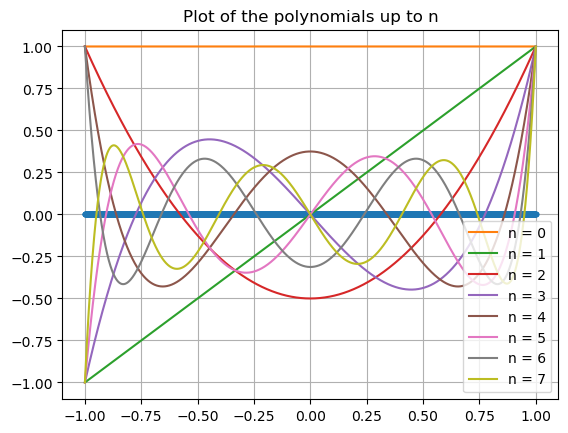

In [8]:
SBP.legplot(SBP.p_n,8,(-1,1))




\begin{split}
    P_0\,(\xi)
    \,&=\,1\\
    P_1\,(\xi)
    \,&=\,\xi\\
    P_n\,(\xi)
    \,&=\,\frac{(2n\,-\,1)\,\xi\, P_{n\,-\,1}\,(\xi)\,-\,(n\,-\,1)\,P_{n\,-\,2}\,(\xi)}{n}\qquad n \geq 2
\end{split}



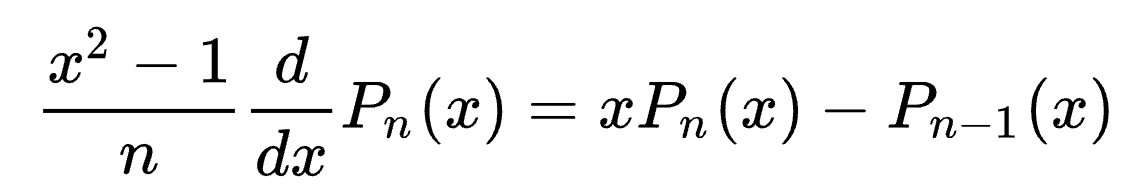

Notice that similarly to how the P_n is defined, what is left is to just define the first two derivatives of the polynomial: 

$$P_0 ' =0 $$

$$P_1 ' = 1$$

so solving for the derivative $\frac{dP_n(x)}{dx}$ 

$$\frac{dP_n(x)}{dx} = \frac{nxP_n(x)-nP_{n-1}(x)}{x^2 -1}$$

((-0.9, 0.9),)


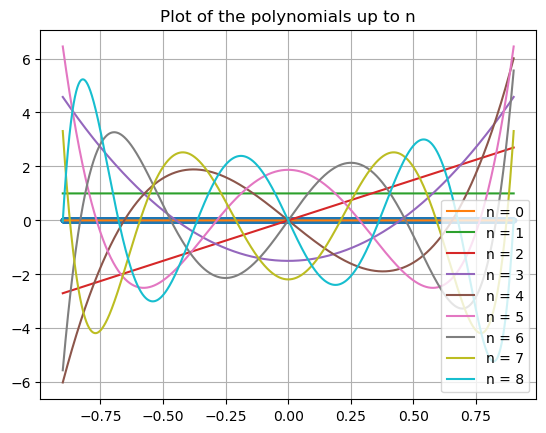

In [9]:
SBP.legplot(SBP.dp_n,9,(-0.9,0.9))

Now in order to find the Gauss-Lobatto points, a system 

It is worth noting that the Lagrange polynomials are equal to the original function at the collocation points. The order of the polynomial $N$ requires $N+1$ points or function evaluations in order to fully determine the polynomial. And since the lagrange polynomial is unique, then any polynomial of degree $N$ that passes through the points, will be equal to the lagrange polynomial: 


$$f(x) \approx L_N (x) = \sum _{i=0}^{N} L_i f_i = L^T \bar{f}$$

where $L$ is a vector of the lagrange coefficients, and $\bar{f}$ is a vector of functional evaluations of $f$ at $x_i$ points. 



This means that if $f(x) = P_N(x)$, then the lagrange polynomial becomes an equality rather than an approximation. 

In this section I will attempt to re-derive the entropy variables from the entropy function as defined by the [Parsani_JCP_15]

$$\frac{\partial S}{\partial \bar{q}}$$

where $\bar{q}$ is defined as follows: 

$$\bar{q} ^T = \begin{bmatrix} \rho & \rho u & \rho v & \rho w & \rho E \end{bmatrix}$$


and $S$ is defined as follows : 

$$ S = -\rho s = -\rho \left(\frac{R}{\gamma -1} \log\left(\frac{T}{T_{\infty}}\right) - R\log\left( \frac{\rho}{\rho_{\infty}}\right)\right)$$

where the $R$, $\gamma$, $T_{\infty}$, and $\rho_{\infty}$ are all constants. 

## Entropy of PDE's 

(i) $S$ is concave 

(ii) $\frac{\partial S}{\partial E} > 0$ which means that the chaos of energy should only increase with more energy. 

(iii) $S$ is positvely homogeneous of degree 1. In other words, 

$$S(\lambda E,\lambda X_1, \cdots) = \lambda S(E,X_1,\cdots) for \lambda > 0 $$


### Definitions 

* $T = E_S = \frac{\partial E}{\partial S}$ " Energy carried by chaos " 
* $P_k = -\frac{\partial E}{\partial X_k}$ Generalized Force, or "Rate of change of energy based on the change in state"

* $E = E(\lambda S,\lambda X_1, \cdots) = \lambda E(S,X_1,\cdots) for \lambda > 0$ positively homogeneous if degreee 1 (PHD1)

* $ T and P_k$ are positively homogeneous of degree 0 meaning 
$$T(\lambda S,\lambda X_1, \cdots) = T(S,X_1,\cdots) for \lambda > 0$$
$$P_k(\lambda S,\lambda X_1, \cdots) = P_k(S,X_1,\cdots) for \lambda > 0$$

This means that $S and E$ along with all the states $X_1,\cdots,X_m$ are Extensive parameters. And $T and P_k$ are intensive parameters. 

The above definitions will be made clear here: 
Starting with PHD1

$$W = E(S(W,X_1,X_2,\cdots), X_1, X_2, \cdots)$$
recall $$S(\lambda E,\lambda X_1, \cdots) = \lambda S(E,X_1,\cdots) for \lambda > 0 $$

$$\lambda W = E(S(\lambda W,\lambda X_1,\lambda X_2,\cdots), \lambda X_1, \lambda X_2, \cdots) $$

which can be reduced to 

$$\lambda W = E(\lambda S(W,X_1,X_2,\cdots), \lambda X_1, \lambda X_2, \cdots)$$

Now replace $W$ with $E$ and we get: 

$$\lambda E(S(W,X_1,X_2,\cdots), X_1, X_2, \cdots) = E(\lambda S(W,X_1,X_2,\cdots), \lambda X_1, \lambda X_2, \cdots)$$

Now looking at the PHD0 of Temparature: 

we return to this: 

$$\lambda E(S(W,X_1,X_2,\cdots), X_1, X_2, \cdots) = E(\lambda S(W,X_1,X_2,\cdots), \lambda X_1, \lambda X_2, \cdots)$$

and now differentiating $E$ with respect to $S$. Notice that an extra lambda pops out via the chain rule: 

$$\frac{\partial }{\partial S}\left(E(\lambda S(W,X_1,X_2,\cdots), \lambda X_1, \lambda X_2, \cdots)\right) = \frac{\partial E}{\partial S} \left(\frac{\partial (\lambda S)}{\partial S} \right) = \lambda \frac{\partial E}{\partial S}$$

Thus after differentiating both sides we get: 

$$\lambda \frac{\partial E(S(W,X_1,X_2,\cdots), X_1, X_2, \cdots)}{\partial S} = \lambda \frac{\partial E(\lambda S(W,X_1,X_2,\cdots), \lambda X_1, \lambda X_2, \cdots)}{\partial S}$$

and recalling that temprature is defined as $\frac{\partial E}{\partial S} = T$ and substituing in the equation we get: 

$$\lambda T(S(W,X_1,X_2,\cdots), X_1, X_2, \cdots) = \lambda T(\lambda S(W,X_1,X_2,\cdots), \lambda X_1, \lambda X_2, \cdots)$$

Thus, PHD0 is proven for Temprature. The same process is done for the generalized force. 

Now onto prooving $T = E_S$:

$$W = E(S(W,X_1,X_2,\cdots), X_1, X_2, \cdots)$$

where $W$ is the total energy of the system. Then taking a total derivative with respect to the state $X_k$: 

$$\frac{dW}{dX_k} = \frac{\partial E}{\partial S} \frac{\partial S}{\partial X_k} + \frac{\partial E}{\partial X_k} = T\frac{\partial S}{\partial X_k} - P_k$$

NOTE: 
It is worth noting that $S$ is called a $\textbf{Fundemental Equation}$ and any identity involving a derived quantity such as $T or P_k$ is called an $\textbf{Equation of State}$.

Combining all of the above into a general statement known as the $\textbf{Gibbs' Formula}$: 


$$Let W=E \rightarrow\frac{dE}{dX_k} = \frac{\partial E}{\partial S}\frac{\partial S}{\partial X_k}+\frac{\partial E}{\partial X_k}$$

Then multiply the entire equation by the differential $X_k$ and sum over all $k's$: 

$$dE = TdS-\sum_{k=1}^{m}P_kdX_k$$



It is worth noting that the parameter $X_k$ is an Extensive parameter, while the derived parameter $P_k = -\frac{\partial E}{\partial X_k}$ is an Intensive parameter.

### Convexity of Entropy and Energy 

Let A and B be two thermal systems in equilibria, with each of the systems' Energy and entropy having no spatial or temporal dependace (See picture below). 

$$S^A = S^A(E^A,\cdots, X_k^A,\cdots)$$
$$S^B = S^B(E^B,\cdots, X_k^B,\cdots)$$

With total Entropy of the system being

$$S = S^A + S^B$$

and this is a consequence of the extensive property [See Entropy and PDE pg 12 - Additivity of Extensive properties]


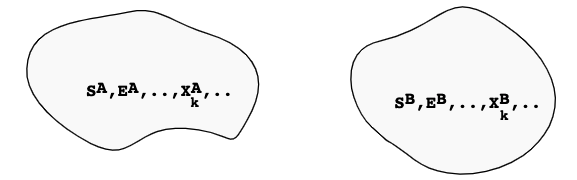